In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

In [9]:
data = pd.read_csv('./4K_House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [10]:
data.shape

(4746, 12)

### Gradient Descent

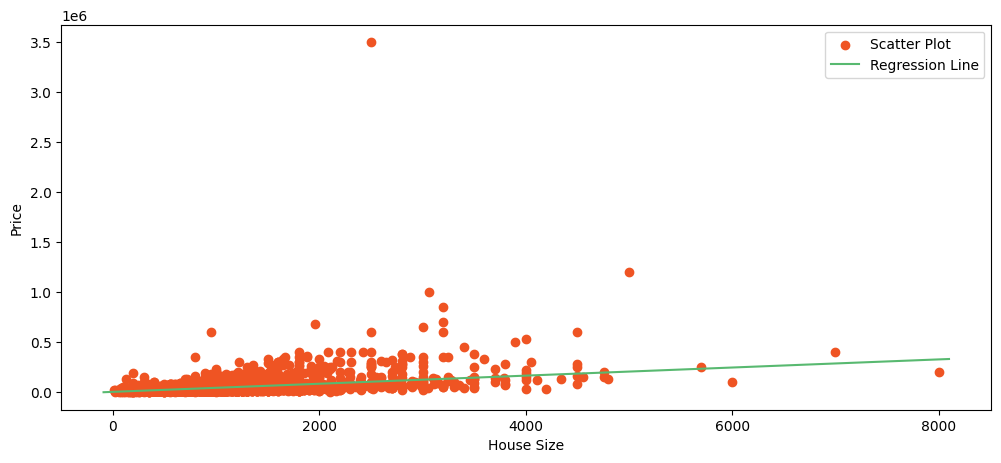

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming data is loaded and defined earlier

X = data['Size']
Y = data['Rent']

m = len(X)
epoch = 100
learning_rate = 0.0000001
theta_0 = 0
theta_1 = 3

# Lists to store theta values for contour plot
theta0_vals = []
theta1_vals = []
cost_vals = []

for i in range(epoch):
    temp_0 = 0
    temp_1 = 0
    for j in range(m):
        temp_0 += (theta_0 + theta_1 * X[j] - Y[j])
        temp_1 += (theta_0 + theta_1 * X[j] - Y[j]) * X[j]

    theta_0 = theta_0 - learning_rate * (temp_0) / m
    theta_1 = theta_1 - learning_rate * (temp_1) / m

    sum_ = 0
    for k in range(m):
        sum_ += (theta_0 + theta_1 * X[k] - Y[k]) ** 2
    cost = sum_ / (2 * m)

    # Append values for contour plot
    theta0_vals.append(theta_0)
    theta1_vals.append(theta_1)
    cost_vals.append(cost)


# Plotting Data and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = theta_1 * x + theta_0

plt.figure(figsize=(12, 5))

# Scatter Plot
plt.scatter(X, Y, c="#ef5423", label='Scatter Plot')
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()

plt.show()


### Contour Plot

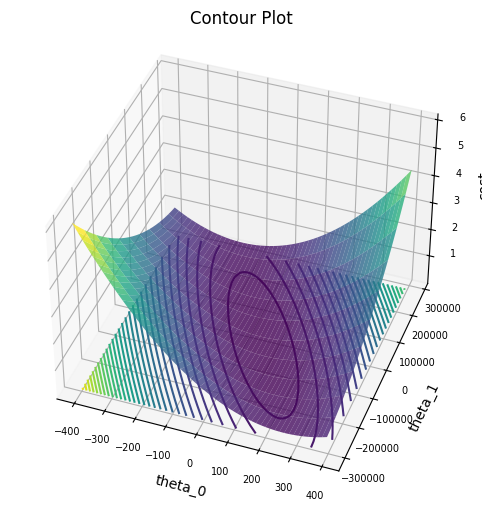

In [12]:
def loss(a,b):
  return 1/len(X)*(np.sum((a*X + b - Y)**2))  

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection="3d")
a = np.arange(-400, 400, 5)
b = np.arange(-300000, 300000, 20000)
A, B = np.meshgrid(a, b) # makes repetetive 2D arrays from a and b
zs = np.array([loss(a,b) for a,b in zip(np.ravel(A), np.ravel(B))])
loss_vals = zs.reshape(A.shape)

ax.plot_surface(A, B, loss_vals, cmap="viridis", rstride=3, cstride=3,edgecolor='none',alpha=0.8)
ax.contour(A, B, loss_vals, 30, cmap="viridis", linestyles="solid", offset=0)
ax.view_init(40, 290)

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cost',rotation="vertical")
ax.set_title('Contour Plot')
# ax.scatter3D(2.95, 2.95, 6.1589, c="r",s=90)
plt.tick_params(axis='both', which='major', labelsize=7)

### Normal Equation (using the Dataset used in 1st section : Univariate Linear Regression:)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

In [14]:
X = np.array([[1, 2000], [1, 2100], [1, 1100], [1, 2200], [1, 1000]])
S = np.matmul(X.T, X)
Y = np.array([[810], [907], [312], [950], [301]])
P = np.matmul(X.T, Y)
from numpy.linalg import inv
S = inv(S)
theta = np.matmul(S, P)
print(theta)

[[-276.84866469]
 [   0.55526706]]
